In [26]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model

import warnings
warnings.filterwarnings("ignore")

In [27]:
# Load dataset

df = pd.read_csv("HR-employee-attrition.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


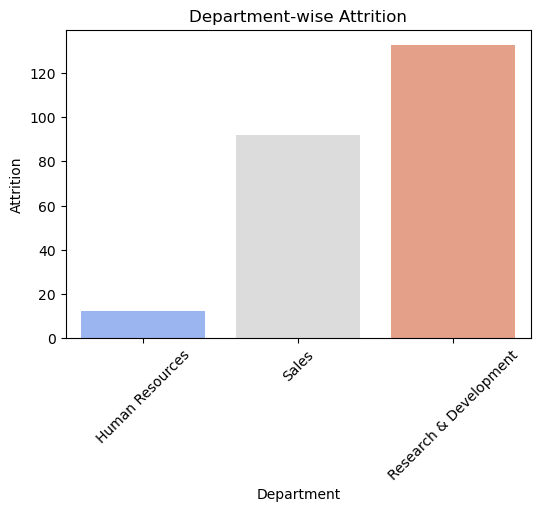

In [30]:
# Department-wise Attrition

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

Attrition_by_Department = df.groupby("Department")["Attrition"].sum().sort_values()
plt.figure(figsize=(6,4))
sns.barplot(x=Attrition_by_Department.index.astype(str), y=Attrition_by_Department.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Department-wise Attrition")
plt.ylabel("Attrition")
plt.show()

In [31]:
df["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [32]:
# Analyzing Salary bands

bins = [0, 3000, 6000, 9000, 12000, df["MonthlyIncome"].max()]
labels = ["Low", "Lower-Mid", "Mid", "Upper-Mid", "High"]
df["SalaryBand"] = pd.cut(df["MonthlyIncome"], bins=bins, labels=labels)

df.groupby(["Department", "SalaryBand"]).size()

Department              SalaryBand
Human Resources         Low            26
                        Lower-Mid      14
                        Mid             8
                        Upper-Mid       4
                        High           11
Research & Development  Low           301
                        Lower-Mid     341
                        Mid           107
                        Upper-Mid      76
                        High          136
Sales                   Low            68
                        Lower-Mid     164
                        Mid           108
                        Upper-Mid      58
                        High           48
dtype: int64

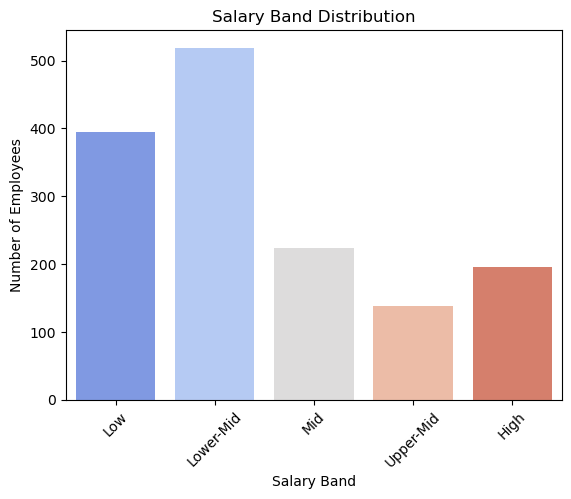

In [33]:
# Visualizing the salary band distribution

sns.countplot(x=df["SalaryBand"], palette="coolwarm")
plt.title("Salary Band Distribution")
plt.xlabel("Salary Band")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

In [34]:
# Analyze Promotions

df["YearsSinceLastPromotion"].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

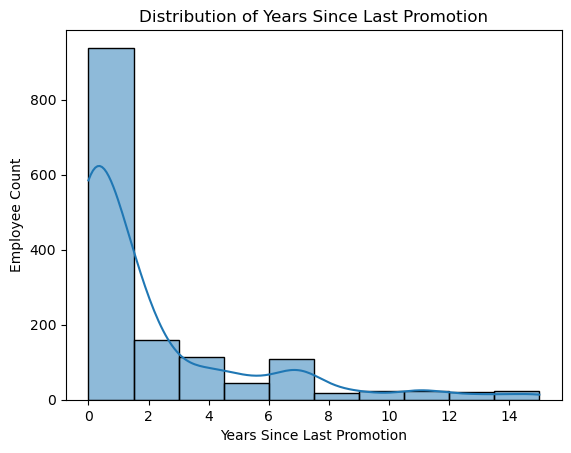

In [35]:
# How often promotions happen

sns.histplot(df["YearsSinceLastPromotion"], bins=10, kde=True, palette="coolwarm")
plt.title("Distribution of Years Since Last Promotion")
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Employee Count")
plt.show()

In [36]:
# Analyzing which departments promote employee faster

df.groupby("Department")["YearsSinceLastPromotion"].mean()

Department
Human Resources           1.777778
Research & Development    2.137357
Sales                     2.354260
Name: YearsSinceLastPromotion, dtype: float64

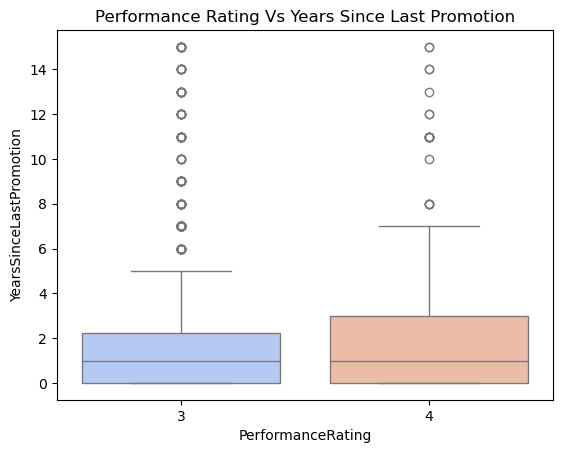

In [37]:
# Analyzing if Performance Rating affects Promotion

sns.boxplot(x=df["PerformanceRating"], y=df["YearsSinceLastPromotion"], palette="coolwarm")
plt.title("Performance Rating Vs Years Since Last Promotion")
plt.show()

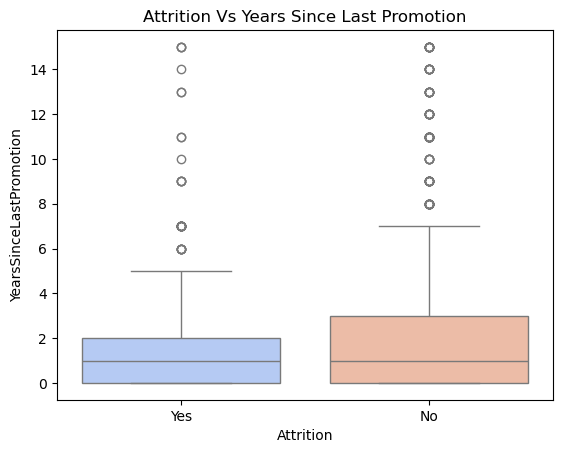

In [38]:
# Analyzing whether lack of promotion leads to employees leaving

df["Attrition"] = df["Attrition"].map({1: "Yes", 0: "No"})

sns.boxplot(x=df["Attrition"], y=df["YearsSinceLastPromotion"], palette="coolwarm")
plt.title("Attrition Vs Years Since Last Promotion")
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   object  
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [40]:
# Building a classsification model

Feature_cols = ["Age", "Education", "JobSatisfaction", "MonthlyIncome", "JobLevel", "PercentSalaryHike", "PerformanceRating", "TotalWorkingYears", "WorkLifeBalance", "YearsAtCompany", "YearsSinceLastPromotion"]
Target = "Attrition"

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

X = df[Feature_cols]
y= df[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Model Accuracy:  ", model.score(X_test, y_test))

Model Accuracy:   0.8367346938775511


In [41]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, model.predict(X_test))

cnf_matrix

array([[246,   0],
       [ 48,   0]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.00      0.00      0.00        48

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.70      0.84      0.76       294



Using 294 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/294 [00:00<?, ?it/s]

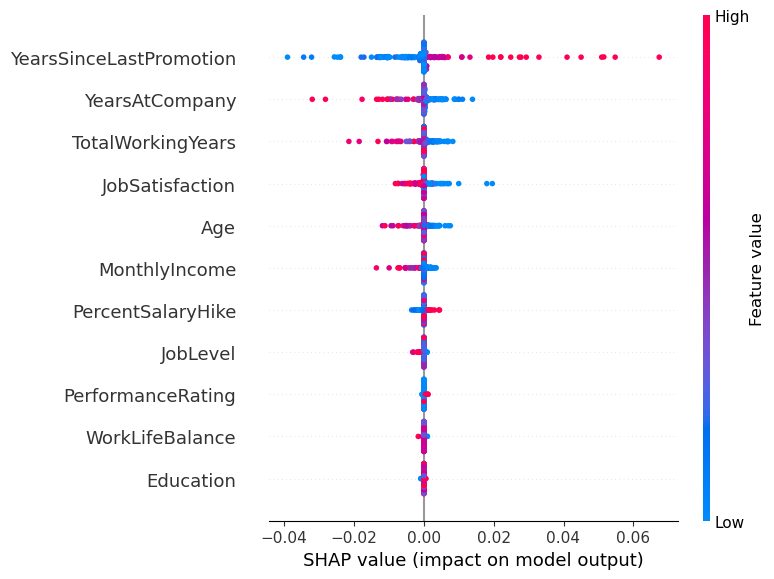

In [43]:
# Performing SHAP analysis

import shap

shap.initjs()  # Enables SHAP interactive plots

explainer = shap.KernelExplainer(lambda x: model.predict(x).astype(float), X_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)  # Displays feature importance